In [32]:
# ESTUDIANTE: KEYAR RAUL FERREL ALFARO

In [33]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv('taller2_MLE.csv')

In [35]:
print(df.dtypes)

edad                       int64
segmento                  object
saldo_total              float64
numero_productos           int64
visitas_app_mes            int64
usa_web                    int64
usa_tarjeta_credito        int64
reclamos_6m                int64
satisfaccion_encuesta    float64
tasa_credito_personal    float64
rango_ingresos            object
region                    object
cerrara_cuenta             int64
dtype: object


In [36]:
df.head()

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0


In [37]:
print(df.dtypes)

edad                       int64
segmento                  object
saldo_total              float64
numero_productos           int64
visitas_app_mes            int64
usa_web                    int64
usa_tarjeta_credito        int64
reclamos_6m                int64
satisfaccion_encuesta    float64
tasa_credito_personal    float64
rango_ingresos            object
region                    object
cerrara_cuenta             int64
dtype: object


In [44]:
print(df['rango_ingresos'].unique())
print(df['rango_ingresos'].isnull().sum())


['Medio' 'Muy Alto' 'Bajo' 'Alto']
0


In [46]:
df['rango_ingresos'] = df['rango_ingresos'].str.replace(' ', '_')


In [67]:
clf = setup(
    data=df,
    target='cerrara_cuenta',
    session_id=2025,
    categorical_features=['segmento', 'region', 'rango_ingresos'],
    remove_multicollinearity=True,
    multicollinearity_threshold=0.85,
    normalize=True,
    feature_selection=True,
    
    fix_imbalance=True,
    fix_imbalance_method='smote'
)


[LightGBM] [Info] Number of positive: 3009, number of negative: 3009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4807
[LightGBM] [Info] Number of data points in the train set: 6018, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 3)"
5,Transformed train set shape,"(6018, 3)"
6,Transformed test set shape,"(1500, 3)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [68]:
#Comparar modelos automaticamente:
best_model_F1 = compare_models(sort='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:57:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4271,0.5126,0.6314,0.1451,0.2359,0.0102,0.0181,0.2690
nb,Naive Bayes,0.4274,0.5159,0.6213,0.1436,0.2332,0.0070,0.0121,0.2730
lr,Logistic Regression,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,1.2430
ridge,Ridge Classifier,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.4290
lda,Linear Discriminant Analysis,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.3030
ada,Ada Boost Classifier,0.5623,0.5132,0.4360,0.1463,0.2187,0.0110,0.0135,0.3970
knn,K Neighbors Classifier,0.5529,0.5122,0.4460,0.1444,0.2181,0.0082,0.0113,0.3700
svm,SVM - Linear Kernel,0.4180,0.4852,0.5885,0.1360,0.2148,-0.0090,-0.0188,0.3130
gbc,Gradient Boosting Classifier,0.5886,0.4980,0.3871,0.1429,0.2085,0.0048,0.0061,0.5710
dt,Decision Tree Classifier,0.6006,0.4980,0.3563,0.1385,0.1993,-0.0027,-0.0027,0.3980


In [69]:
best_model_Recall = compare_models(sort='Recall')

In [70]:
best_model_AUC = compare_models(sort='AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:59:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2770
ridge,Ridge Classifier,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2280
lda,Linear Discriminant Analysis,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2320
nb,Naive Bayes,0.4274,0.5159,0.6213,0.1436,0.2332,0.0070,0.0121,0.3070
ada,Ada Boost Classifier,0.5623,0.5132,0.4360,0.1463,0.2187,0.0110,0.0135,0.3660
qda,Quadratic Discriminant Analysis,0.4271,0.5126,0.6314,0.1451,0.2359,0.0102,0.0181,0.2830
knn,K Neighbors Classifier,0.5529,0.5122,0.4460,0.1444,0.2181,0.0082,0.0113,0.2950
dummy,Dummy Classifier,0.8597,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2510
dt,Decision Tree Classifier,0.6006,0.4980,0.3563,0.1385,0.1993,-0.0027,-0.0027,0.2450
gbc,Gradient Boosting Classifier,0.5886,0.4980,0.3871,0.1429,0.2085,0.0048,0.0061,0.5230


In [71]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5943,0.5325,0.4490,0.1606,0.2366,0.0382,0.0476
1,0.6257,0.5176,0.3673,0.1525,0.2156,0.0221,0.0258
2,0.6171,0.4601,0.2449,0.1101,0.1519,-0.0511,-0.0580
3,0.5800,0.4568,0.2857,0.1111,0.1600,-0.0521,-0.0624
4,0.5771,0.5140,0.4286,0.1489,0.2211,0.0167,0.0212
5,0.6114,0.5093,0.3673,0.1463,0.2093,0.0113,0.0135
6,0.5857,0.4516,0.2653,0.1066,0.1520,-0.0596,-0.0705
7,0.5971,0.4999,0.3673,0.1406,0.2034,0.0011,0.0014
8,0.6057,0.5145,0.3878,0.1496,0.2159,0.0174,0.0209


In [73]:
tuned_dt = tune_model(dt, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7629,0.5225,0.1633,0.1600,0.1616,0.0235,0.0235
1,0.7857,0.5469,0.2041,0.2174,0.2105,0.0867,0.0868
2,0.3714,0.5653,0.8571,0.1647,0.2763,0.0542,0.1167
3,0.7629,0.4772,0.1020,0.1136,0.1075,-0.0288,-0.0288
4,0.7314,0.5137,0.2449,0.1739,0.2034,0.0474,0.0484
5,0.7886,0.5570,0.2041,0.2222,0.2128,0.0909,0.0910
6,0.8171,0.5663,0.2449,0.3077,0.2727,0.1697,0.1711
7,0.7486,0.4675,0.1020,0.1020,0.1020,-0.0441,-0.0441
8,0.7886,0.5155,0.1429,0.1795,0.1591,0.0400,0.0403


Fitting 10 folds for each of 10 candidates, totalling 100 fits


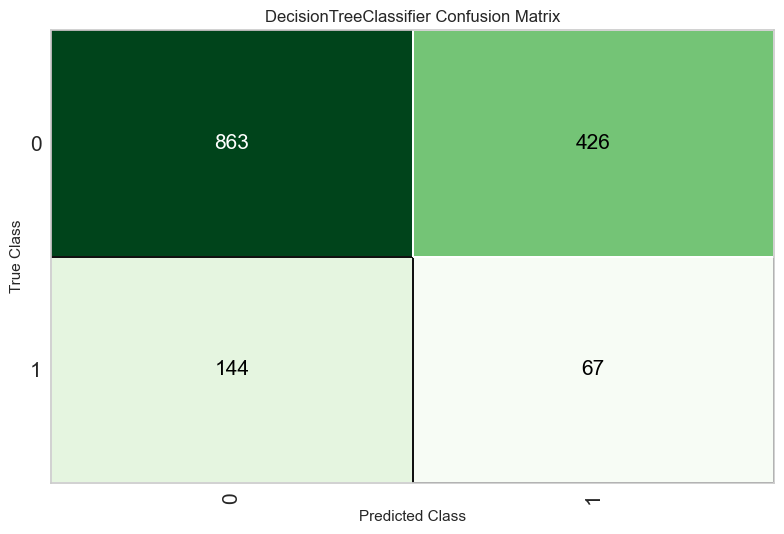

In [74]:
# 7. Interpretación y visualización
plot_model(dt, plot='confusion_matrix')

In [ ]:
# Evaluación interactiva
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:

# 1. Pregunta 1

df = pd.read_csv('taller2_MLE.csv')

print(df.head())


conteo_cierre = df['cerrara_cuenta'].value_counts()
porcentaje_cierre = df['cerrara_cuenta'].mean() * 100  

print("Conteo de clientes por cerrara_cuenta:")
print(conteo_cierre)
print(f"\nPorcentaje de clientes que cerraron su cuenta: {porcentaje_cierre:.2f}%")

total = len(df)
balance = conteo_cierre.min() / conteo_cierre.max()
print(f"\nBalance entre clases (menor/mayor): {balance:.2f}")

if balance < 0.3:
    print("El dataset está desbalanceado.")
else:
    print("El dataset está relativamente balanceado.")


   edad    segmento  saldo_total  numero_productos  visitas_app_mes  usa_web  \
0    48  Preferente     43791.80                 5               11        0   
1    36    Estándar     17940.87                 1                7        0   
2    48    Estándar      9308.09                 4                3        0   
3    30    Estándar       709.76                 5                5        1   
4    74  Preferente     20471.46                 1                4        0   

   usa_tarjeta_credito  reclamos_6m  satisfaccion_encuesta  \
0                    1            1                    4.2   
1                    1            0                    2.2   
2                    1            1                    1.0   
3                    1            0                    5.0   
4                    0            1                    3.1   

   tasa_credito_personal rango_ingresos  region  cerrara_cuenta  
0                  36.82          Medio  Sierra               0  
1             

In [18]:
"""
Tras analizar el dataset, se encontró que el porcentaje de clientes que cerraron su cuenta es 
aproximadamente 14.04%. Esto indica que solo una minoría de clientes efectivamente cerró su cuenta en el periodo estudiado.

Al evaluar el balance entre las clases, se observó que la proporción entre los clientes que cerraron y clientes que no cerraron 
es de aproximadamente 0.16. Debido a que este valor es muy bajo se concluye que el dataset está desbalanceado

"""

'\nTras analizar el dataset, se encontró que el porcentaje de clientes que cerraron su cuenta es \naproximadamente 14.04%. Esto indica que solo una minoría de clientes efectivamente cerró su cuenta en el periodo estudiado.\n\nAl evaluar el balance entre las clases, se observó que la proporción entre los clientes que cerraron y clientes que no cerraron \nes de aproximadamente 0.16. Debido a que este valor es muy bajo se concluye que el dataset está desbalanceado\n\n'

Correlación de variables numéricas con 'cerrara_cuenta':
satisfaccion_encuesta   -0.139740
numero_productos        -0.039085
saldo_total             -0.033003
reclamos_6m              0.024427
tasa_credito_personal   -0.019942
visitas_app_mes          0.012285
edad                     0.008659
Name: cerrara_cuenta, dtype: float64


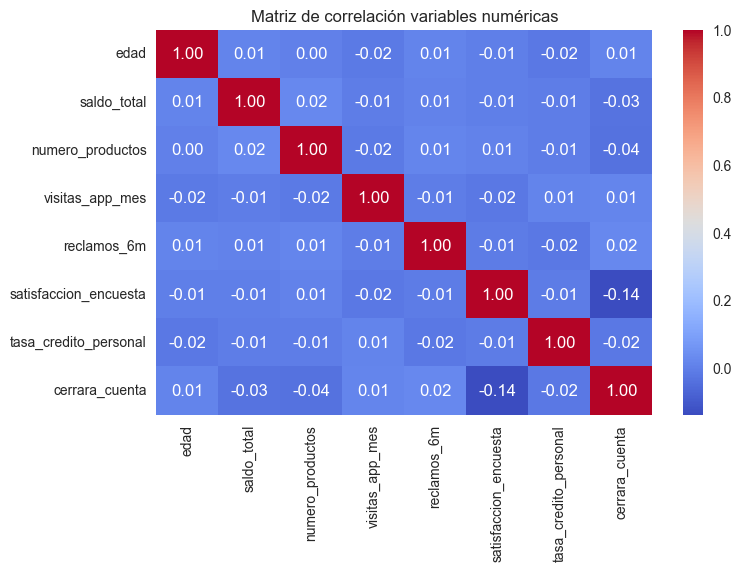


Relación entre segmento y cerrara_cuenta:
segmento
Estándar      0.166446
Preferente    0.103887
Premium       0.091463
Name: cerrara_cuenta, dtype: float64


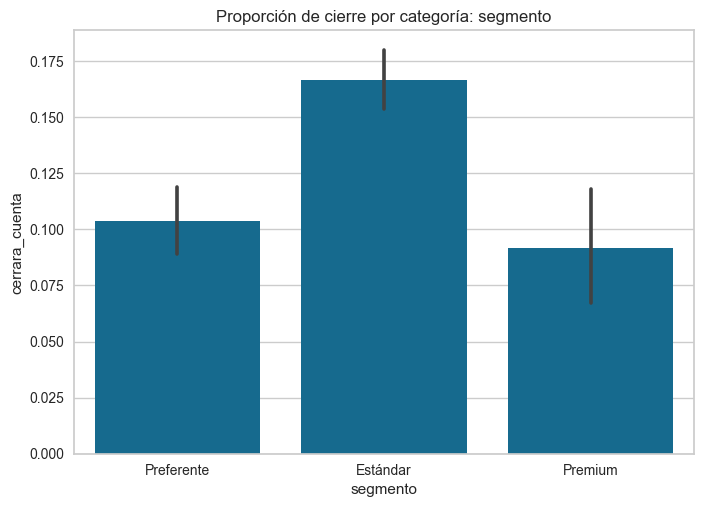


Relación entre rango_ingresos y cerrara_cuenta:
rango_ingresos
Muy Alto    0.150000
Bajo        0.143729
Medio       0.143000
Alto        0.125251
Name: cerrara_cuenta, dtype: float64


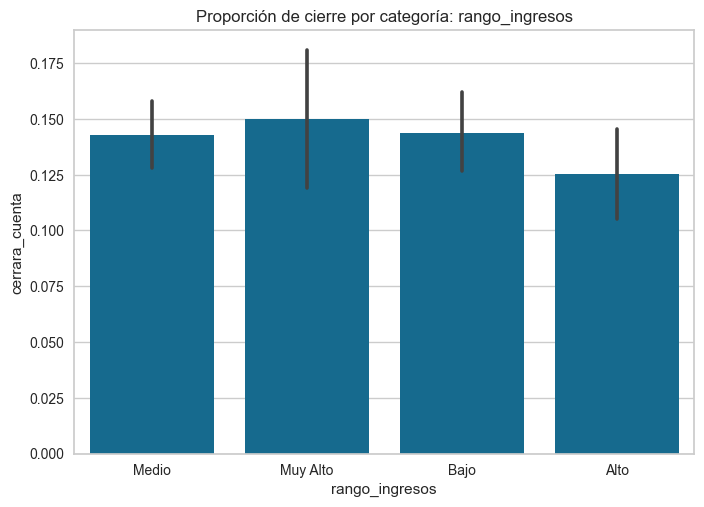


Relación entre region y cerrara_cuenta:
region
Selva     0.145940
Sierra    0.140534
Costa     0.138153
Name: cerrara_cuenta, dtype: float64


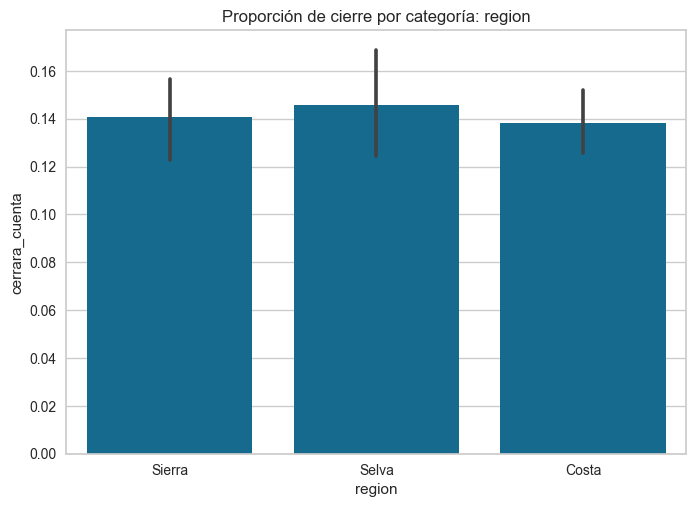


Relación entre usa_web y cerrara_cuenta:
usa_web
0    0.142857
1    0.139342
Name: cerrara_cuenta, dtype: float64


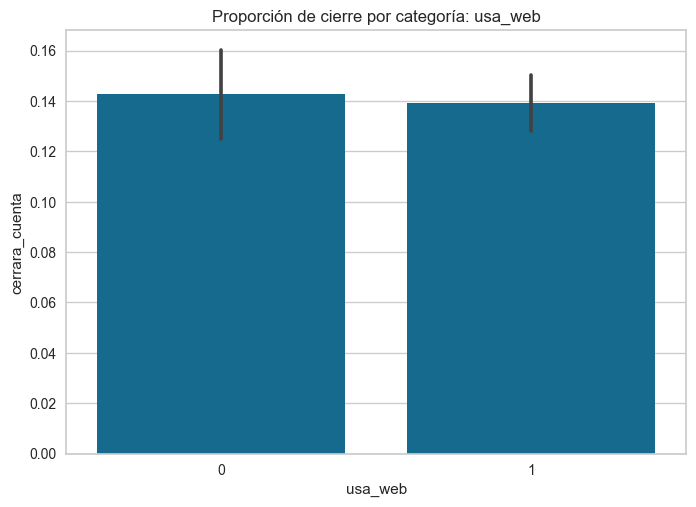


Relación entre usa_tarjeta_credito y cerrara_cuenta:
usa_tarjeta_credito
1    0.146636
0    0.130547
Name: cerrara_cuenta, dtype: float64


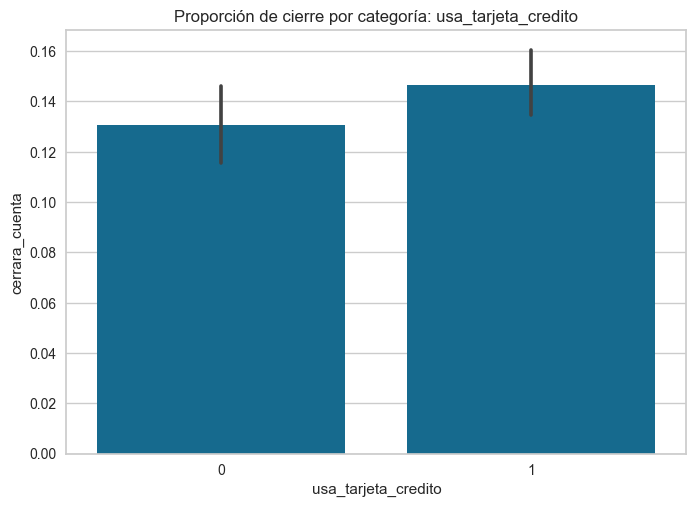

In [ ]:
# Pregunta 2

num_vars = ['edad', 'saldo_total', 'numero_productos', 'visitas_app_mes', 
            'reclamos_6m', 'satisfaccion_encuesta', 'tasa_credito_personal']

# Correlación con cerrara_cuenta (numérica)
corr_matrix = df[num_vars + ['cerrara_cuenta']].corr()
corr_target = corr_matrix['cerrara_cuenta'].drop('cerrara_cuenta').sort_values(key=abs, ascending=False)

print("Correlación de variables numéricas con 'cerrara_cuenta':")
print(corr_target)

# Visualizar
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación variables numéricas')
plt.show()

# Para variables categóricas: 'segmento', 'rango_ingresos', 'region', 'usa_web', 'usa_tarjeta_credito'
# Evaluamos el promedio de cierre en cada categoría

categorical_vars = ['segmento', 'rango_ingresos', 'region', 'usa_web', 'usa_tarjeta_credito']

for cat in categorical_vars:
    print(f"\nRelación entre {cat} y cerrara_cuenta:")
    print(df.groupby(cat)['cerrara_cuenta'].mean().sort_values(ascending=False))
    
    plt.figure()
    sns.barplot(x=cat, y='cerrara_cuenta', data=df)
    plt.title(f'Proporción de cierre por categoría: {cat}')
    plt.show()

In [5]:
"""
1.- ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el
dataset?
 El porcentaje de clientes que cerraron su cuenta es 14%, en comparacion a un 86% que no lo hicieron. La data está desbalanceada,
 y el modelo puede tender a favorecer a la clase mayorista.

"""

'\n1.- ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el\ndataset?\n El porcentaje de clientes que cerraron su cuenta es 14%, en comparacion a un 86% que no lo hicieron. La data está desbalanceada,\n y el modelo puede tender a favorecer a la clase mayorista.\n\n'

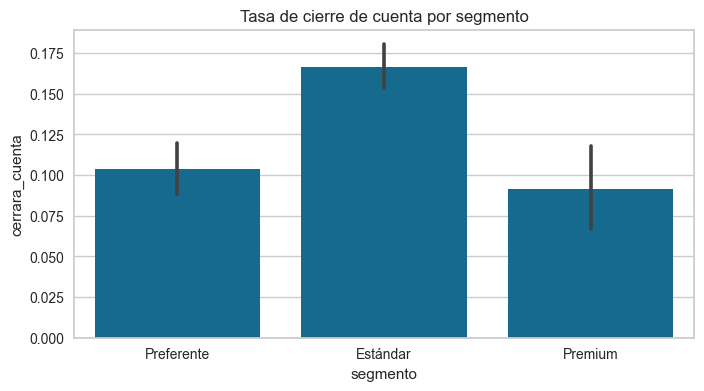

In [6]:

# 2. Análisis exploratorio: 
df['tasa_cierre'] = df['cerrara_cuenta']
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='segmento', y='cerrara_cuenta')
plt.title("Tasa de cierre de cuenta por segmento")
plt.show()

In [7]:
# 3. Uso digital
df['indice_digital'] = np.sqrt(df['visitas_app_mes'] * 0.6 + df['usa_web'] * 1.0 + df['usa_tarjeta_credito'] * 1.2)

In [8]:
# Edad
df['edad_grupo'] = pd.cut(df['edad'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

# Saldo
df['saldo_rango'] = pd.qcut(df['saldo_total'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

In [9]:
# Interacción de region con segmento
df['segmento_region'] = df['segmento'] + "_" + df['region']

In [10]:
# Reemplazar espacios y caracteres especiales en categorías
for col in ['rango_ingresos', 'saldo_rango']:
    df[col] = df[col].astype(str).str.replace(' ', '_').str.replace('á', 'a').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u').str.replace('é', 'e')

# También en otras categóricas si es necesario
for col in ['segmento_region']:
    df[col] = df[col].astype(str).str.replace(' ', '_')


In [11]:
categorical_vars = ['segmento', 'rango_ingresos', 'region', 'edad_grupo', 'saldo_rango', 'segmento_region']
numerical_vars = ['edad', 'numero_productos', 'reclamos_6m', 'satisfaccion_encuesta', 'tasa_credito_personal', 'indice_digital']
ignore_features = ['saldo_total', 'visitas_app_mes', 'usa_web', 'usa_tarjeta_credito']
clf = setup(data=df,
            target='cerrara_cuenta',
            categorical_features=categorical_vars,
            numeric_features=numerical_vars,
            ignore_features=ignore_features,
            normalize=True,
            feature_selection=True,
            remove_multicollinearity=True,
            transformation=True,
            transformation_method='yeo-johnson',
            session_id=2025)

[LightGBM] [Info] Number of positive: 491, number of negative: 3009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140286 -> initscore=-1.812919
[LightGBM] [Info] Start training from score -1.812919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 18)"
4,Transformed data shape,"(5000, 3)"
5,Transformed train set shape,"(3500, 3)"
6,Transformed test set shape,"(1500, 3)"
7,Ignore features,4
8,Numeric features,6
9,Categorical features,6


In [14]:
# 5. Comparar modelos
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:57:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8230
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1790
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1710
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2400
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2620
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2990
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4030
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3020
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3510
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3430


In [14]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.6354,0.5000,1.0000,0.6667,0.6000,0.6547
1,0.7500,0.7812,0.2500,0.5000,0.3333,0.2000,0.2182
2,0.8750,0.8974,0.6667,0.6667,0.6667,0.5897,0.5897
3,0.8750,0.6410,0.3333,1.0000,0.5000,0.4483,0.5375
4,0.8667,0.8889,0.6667,0.6667,0.6667,0.5833,0.5833
5,0.7333,0.5139,0.3333,0.3333,0.3333,0.1667,0.1667
6,0.8000,0.8750,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7333,0.3056,0.0000,0.0000,0.0000,-0.1111,-0.1336
8,0.7333,0.5278,0.0000,0.0000,0.0000,-0.1111,-0.1336


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.6771,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7500,0.8125,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8750,0.7692,0.3333,1.0000,0.5000,0.4483,0.5375
3,0.8750,0.8205,0.3333,1.0000,0.5000,0.4483,0.5375
4,0.8667,0.8889,0.3333,1.0000,0.5000,0.4444,0.5345
5,0.8000,0.6944,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8000,0.6806,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8000,0.3750,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8000,0.6250,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


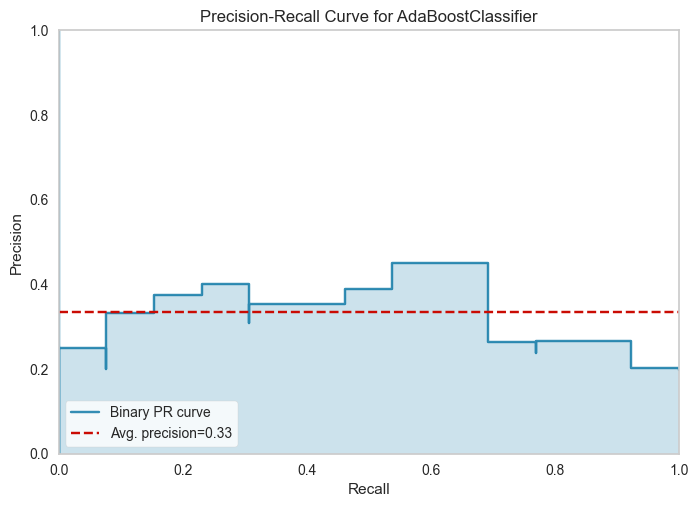

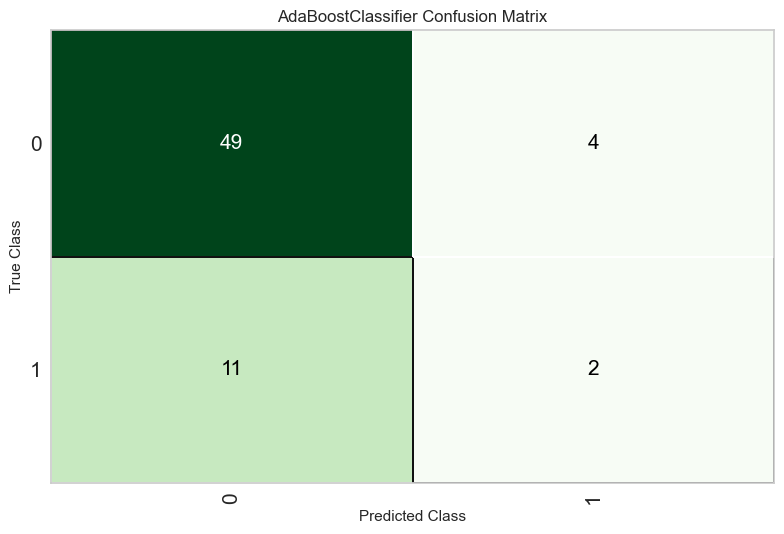

In [16]:
# 6. Ajuste fino y visualización
final = tune_model(ada, optimize='Prec.')
plot_model(final, plot='pr')  # Precision-Recall
plot_model(final, plot='confusion_matrix')

In [19]:
# 8. Simular una campaña antes de lanzarla
nueva_campaña = pd.DataFrame({
    'plataforma': ['YouTube'],
    'segmento': ['Adulto'],
    'likes': [180],
    'comentarios': [45],
    'engagement': [np.sqrt(180 * 0.7 + 45 * 1.5)],
    'duracion_categoria': ['Medio'],
    'canal_segmento': ['YouTube_Adulto']
})

In [23]:
resultado = predict_model(final, data=nueva_campaña)
print("Conversión esperada:", resultado[['prediction_label', 'prediction_score']])

Conversión esperada:    prediction_label  prediction_score
0                 0            0.5304


In [24]:
# 9. Exportar modelo para uso por el equipo creativo
save_model(final, 'modelo_marketing_conversion_predictor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['likes', 'comentarios',
                                              'engagement'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['plataf...
                                                                                          num_le